In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
!pip install openml
import openml
import pandas as pd

# Load dataset from OpenML
dataset = openml.datasets.get_dataset(43672)
df, *_ = dataset.get_data()

# Show the first few rows of the dataset
df.head()

# Load dataset from OpenML
dataset = openml.datasets.get_dataset(43672)
df, *_ = dataset.get_data()

# Show the first few rows of the dataset
df.head()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.6 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=2fa84963d3c99c67469000bdf03a79aaa42ec098c8244bfe5a6f111e648fc1cf
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Check for missing values
df.isnull().sum()

# Fill missing values or drop rows/columns with missing data
df.fillna(df.mean(), inplace=True)

# Encode categorical variables using one-hot encoding or label encoding
df = pd.get_dummies(df, drop_first=True)

# Split features and labels
X = df.drop('target', axis=1)  # 'target' is assumed to be the label column
y = df['target']

# Normalize or standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Evaluate performance using accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8613445378151261
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix:
[[ 90  17]
 [ 16 115]]


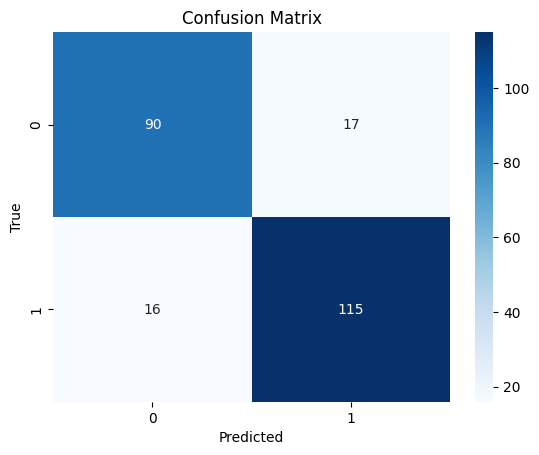

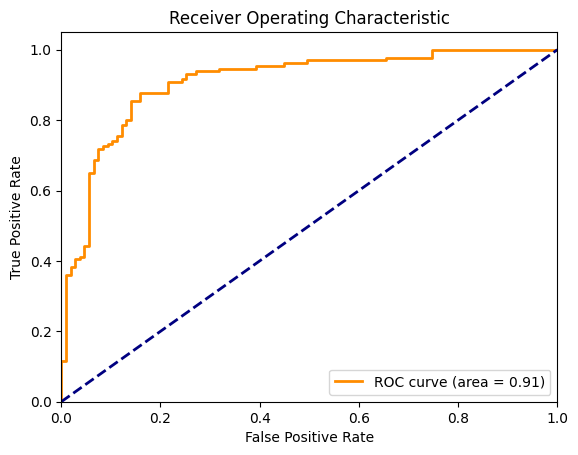

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print(f'Accuracy (SVM): {accuracy_score(y_test, y_pred_svm)}')


Accuracy (SVM): 0.8445378151260504


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}')


Accuracy (Random Forest): 0.9495798319327731


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

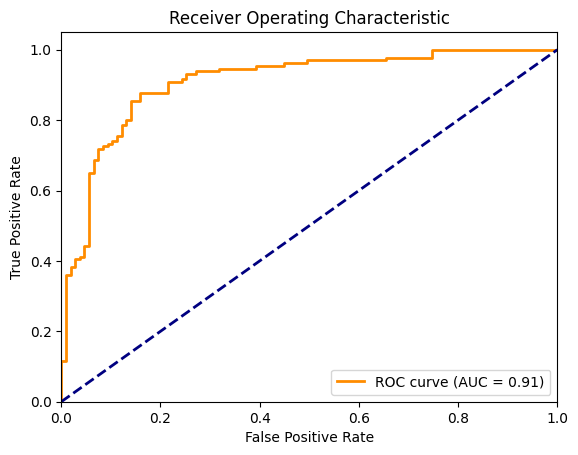

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


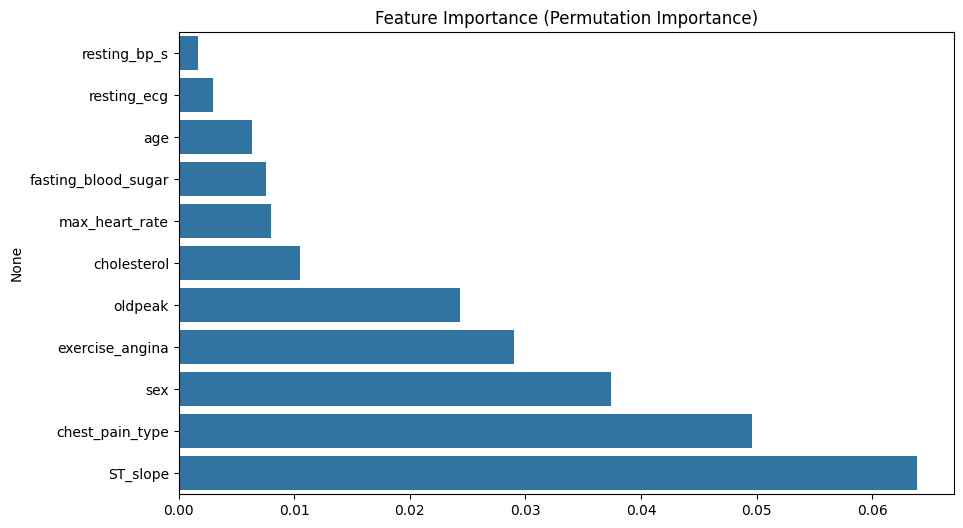

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance # Import for permutation importance


# Assuming 'model' is your LogisticRegression model
# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], orient='h') # Assuming 'X' is your feature data
plt.title('Feature Importance (Permutation Importance)')
plt.show()

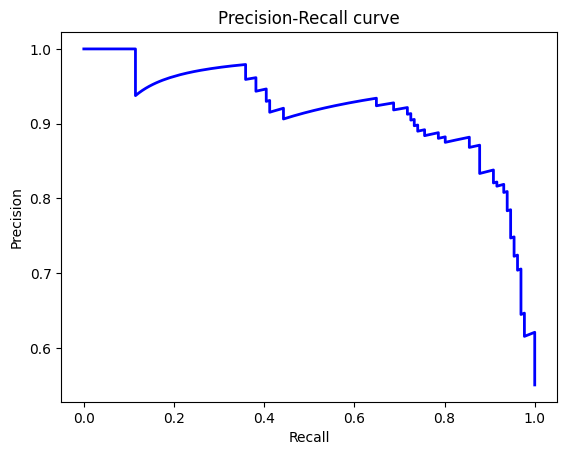

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.2 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=defa76e30282e32b195c0d496dd5726e2851d353e38223e0a92efcc8d94ceef9
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
age                    0
sex                    0
chest_p

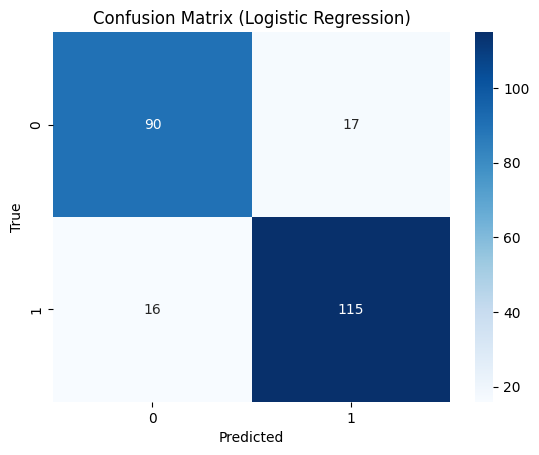

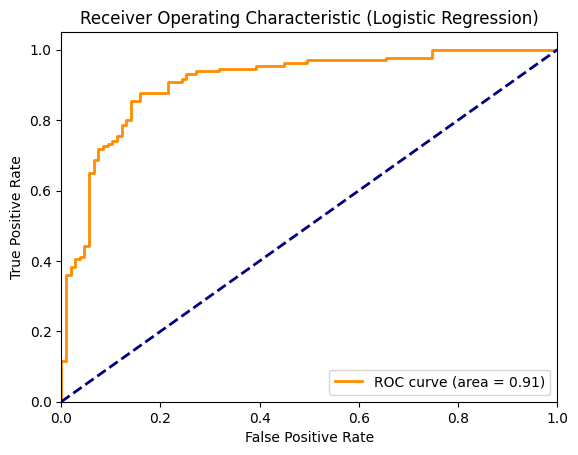

Accuracy (SVM): 0.8445378151260504
Accuracy (Random Forest): 0.9495798319327731


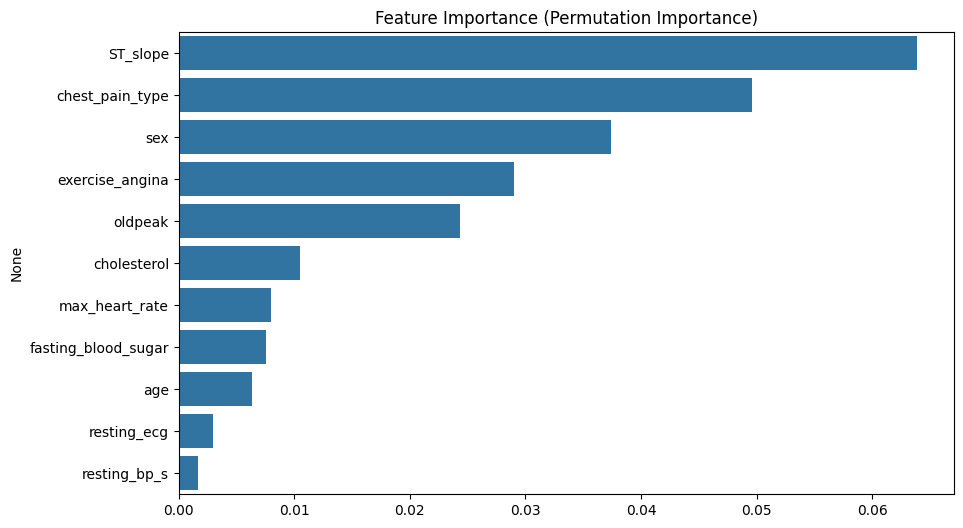

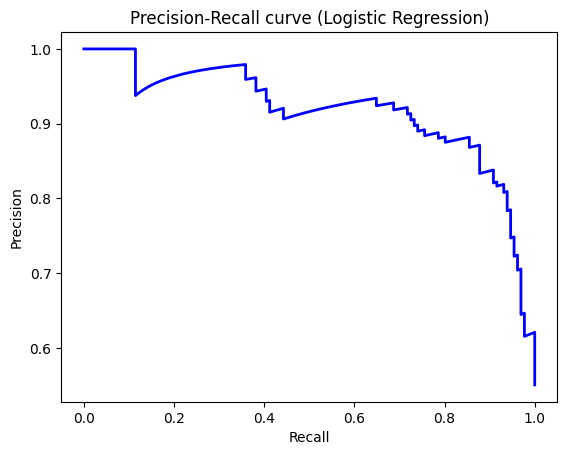

In [1]:
# Install and import necessary packages
!pip install pandas numpy scikit-learn matplotlib seaborn openml

import openml
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from OpenML
dataset = openml.datasets.get_dataset(43672)
df, *_ = dataset.get_data()

# Show the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and labels
X = df.drop('target', axis=1)  # Make sure 'target' is your actual label column
y = df['target']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)
print(f'Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_logistic)}')
print('Classification Report (Logistic Regression):')
print(classification_report(y_test, y_pred_logistic))
print('Confusion Matrix (Logistic Regression):')
print(confusion_matrix(y_test, y_pred_logistic))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

# Initialize and evaluate SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f'Accuracy (SVM): {accuracy_score(y_test, y_pred_svm)}')

# Initialize and evaluate RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}')

# Save the trained Logistic Regression model
joblib.dump(logistic_model, 'logistic_heart_disease_model.pkl')

# Permutation Feature Importance for Logistic Regression
result = permutation_importance(logistic_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()[::-1]

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], orient='h')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

# Precision-Recall Curve for Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (Logistic Regression)')
plt.show()

In [8]:
import joblib
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Load the saved Logistic Regression model
logistic_model = joblib.load('logistic_heart_disease_model.pkl')

# Load the scaler used during training
# Replace with the actual scaler used during training
# scaler = joblib.load('scaler.pkl')
# For demonstration purposes, we'll create a dummy scaler
scaler = StandardScaler().fit(np.random.rand(100, 11))  # Example fit, replace with your trained scaler.

# Define the input features expected by the model
input_features = [
    'rpbs', 'age', 'resting_ecg', 'fasting_blood_sugar', 'max_heart_rate',
    'cholesterol', 'oldpeak', 'exercise_angina', 'sex', 'chest_pain_type', 'st_slope'
]

# Create widgets for each feature
widgets_dict = {
    'rpbs': widgets.FloatText(description='Resting BP'),
    'age': widgets.FloatText(description='Age'),
    'resting_ecg': widgets.IntSlider(value=0, min=0, max=2, step=1, description='Resting ECG'),
    'fasting_blood_sugar': widgets.RadioButtons(options=[('True', 1), ('False', 0)], description='Fasting BS > 120'),
    'max_heart_rate': widgets.FloatText(description='Max Heart Rate'),
    'cholesterol': widgets.FloatText(description='Cholesterol'),
    'oldpeak': widgets.FloatText(description='Oldpeak'),
    'exercise_angina': widgets.RadioButtons(options=[('Yes', 1), ('No', 0)], description='Exercise Angina'),
    'sex': widgets.RadioButtons(options=[('Male', 1), ('Female', 0)], description='Sex'),
    'chest_pain_type': widgets.IntSlider(value=0, min=0, max=3, step=1, description='Chest Pain Type'),
    'st_slope': widgets.IntSlider(value=0, min=0, max=2, step=1, description='ST Slope')
}

# Display widgets in the order of appearance
display_widgets = [widgets_dict[feature] for feature in input_features]

# Create an output widget to display the result
result = widgets.Output()

# Function to make prediction based on input values
def make_prediction(button):
    # Clear previous output
    result.clear_output()

    try:
        # Extract the values input by the user
        values = []
        for feature in input_features:
            value = widgets_dict[feature].value
            values.append(value)

        # Print the values for debugging
        print("Feature values:", values)

        # Convert to numpy array and reshape for the model
        user_input = np.array(values).reshape(1, -1)

        # Print the reshaped values for debugging
        print("Reshaped feature values:", user_input)

        # Scale the input
        input_scaled = scaler.transform(user_input)

        # Print the scaled values for debugging
        print("Scaled feature values:", input_scaled)

        # Predict using the logistic model
        prediction = logistic_model.predict(input_scaled)
        prediction_prob = logistic_model.predict_proba(input_scaled)

        # Display prediction result
        with result:
            print(f"Prediction: {'Disease Present' if prediction[0] == 1 else 'No Disease'}")
            print(f"Probability of Disease: {prediction_prob[0][1]:.2f}")

    except Exception as e:
        with result:
            print("Error occurred:", str(e))

# Create button to trigger prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(make_prediction)

# Display the widgets and the button
display(*display_widgets, predict_button, result)

FloatText(value=0.0, description='Resting BP')

FloatText(value=0.0, description='Age')

IntSlider(value=0, description='Resting ECG', max=2)

RadioButtons(description='Fasting BS > 120', options=(('True', 1), ('False', 0)), value=1)

FloatText(value=0.0, description='Max Heart Rate')

FloatText(value=0.0, description='Cholesterol')

FloatText(value=0.0, description='Oldpeak')

RadioButtons(description='Exercise Angina', options=(('Yes', 1), ('No', 0)), value=1)

RadioButtons(description='Sex', options=(('Male', 1), ('Female', 0)), value=1)

IntSlider(value=0, description='Chest Pain Type', max=3)

IntSlider(value=0, description='ST Slope', max=2)

Button(description='Predict', style=ButtonStyle())

Output()

Feature values: [0.0, 0.0, 0, 1, 0.0, 0.0, 0.0, 1, 1, 0, 0]
Reshaped feature values: [[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]]
Scaled feature values: [[-1.82178187 -1.92895988 -1.71448684  1.96742188 -1.95743346 -1.78081632
  -1.84682766  1.75332298  1.68625206 -1.85375116 -1.87176324]]
Feature values: [0.0, 0.0, 0, 1, 150.0, 0.0, 0.0, 1, 1, 2, 1]
Reshaped feature values: [[  0.   0.   0.   1. 150.   0.   0.   1.   1.   2.   1.]]
Scaled feature values: [[ -1.82178187  -1.92895988  -1.71448684   1.96742188 545.15563842
   -1.78081632  -1.84682766   1.75332298   1.68625206   5.08692907
    1.95409407]]
Feature values: [0.0, 0.0, 0, 1, 150.0, 0.0, 0.0, 1, 1, 2, 1]
Reshaped feature values: [[  0.   0.   0.   1. 150.   0.   0.   1.   1.   2.   1.]]
Scaled feature values: [[ -1.82178187  -1.92895988  -1.71448684   1.96742188 545.15563842
   -1.78081632  -1.84682766   1.75332298   1.68625206   5.08692907
    1.95409407]]
Feature values: [95.0, 75.0, 1, 1, 150.0, 0.0, 0.0, 1, 1, 2, 1]
Reshaped feat